In [17]:
# Github trends analysis starter
import requests
import html
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Github search API
# https://docs.github.com/en/rest/referencesearch#search-repositories
github_url = 'https://api.github.com/search/repositories'

In [19]:
# construct search query "Q1-B"
q = '"cloud accounting" created:2020-01-01..2021-07-21'

# MODIFY the query: add keywords of your interest, for example
#q = '"business analytics" created:2020-01-01..2021-06-01'

In [20]:
# request parameters
qparams = {'q' : q, 'sort' : 'stars', 'order': 'desc', 'per_page' : 100} #ask about the max per page

In [21]:
# review class session on working with APIs
r = requests.get(url=github_url, params=qparams)
r

<Response [200]>

In [22]:
res = r.json()
res.keys() #Q1-E

dict_keys(['total_count', 'incomplete_results', 'items'])

In [23]:
# items returned in the response (first page)
len(res['items'])

64

In [25]:
# inspects results item structure
res['items'][0]

{'id': 287727295,
 'node_id': 'MDEwOlJlcG9zaXRvcnkyODc3MjcyOTU=',
 'name': 'ness',
 'full_name': 'nessjs/ness',
 'private': False,
 'owner': {'login': 'nessjs',
  'id': 69717325,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjY5NzE3MzI1',
  'avatar_url': 'https://avatars.githubusercontent.com/u/69717325?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/nessjs',
  'html_url': 'https://github.com/nessjs',
  'followers_url': 'https://api.github.com/users/nessjs/followers',
  'following_url': 'https://api.github.com/users/nessjs/following{/other_user}',
  'gists_url': 'https://api.github.com/users/nessjs/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/nessjs/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/nessjs/subscriptions',
  'organizations_url': 'https://api.github.com/users/nessjs/orgs',
  'repos_url': 'https://api.github.com/users/nessjs/repos',
  'events_url': 'https://api.github.com/users/nessjs/events{/privacy}',
  'received_eve

In [26]:
stop_words = set(stopwords.words('english'))

# text cleaning function
def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and w.isalnum()]
    
    # return clean string
    return ' '.join(wt_filt)

In [27]:
# clean text of repository descriotions
text_cleanup(res['items'][2]['description'])

'automate github actions allow list github enterprise cloud accounts'

In [28]:
# list of cleaned-up top repository description strings
descr = [text_cleanup(r['description']) for r in res['items']]
descr

['deploy web sites apps cloud account effortlessly',
 'workshop requires tibco cloud account get started free trial 30 seconds select tibco integration tibco mashery tibco liveapps',
 'automate github actions allow list github enterprise cloud accounts',
 'github action login okteto cloud account api token',
 'ibm cloud account extension visual studio code provides single ibm cloud experience ibm extensions',
 'system manage cloud accounts large enterprises',
 'fsmega total commander plugin allows access files stored mega cloud accounts',
 'run individual configuration compliance security controls full compliance benchmarks cis across alibaba cloud accounts using steampipe',
 'public repository contains necessary code deploy resources elastio backup solution customer cloud account',
 'terraform module create aws resources redis labs cloud account',
 'aws cloud account onboarding rapticore',
 'generates diagram ibm cloud accounts',
 '',
 'real cloud accounting beancount github codespace

In [29]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in descr])

In [30]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [31]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('cloud', 'account'), 38),
 (('cloud', 'accounts'), 15),
 (('ibm', 'cloud'), 20),
 (('alibaba', 'cloud'), 5),
 (('terraform', 'module'), 10),
 (('module', 'create'), 4),
 (('aws', 'cloud'), 3),
 (('cloud', 'accounting'), 5),
 (('google', 'cloud'), 12),
 (('cloud', 'console'), 4),
 (('project', 'selector'), 4),
 (('selector', 'page'), 4),
 (('create', 'cloud'), 5),
 (('cloud', 'project'), 4),
 (('create', 'project'), 3),
 (('page', 'make'), 3),
 (('billing', 'enabled'), 4),
 (('compute', 'engine'), 9),
 (('cloud', 'sdk'), 3),
 (('cloud', 'datalab'), 10),
 (('local', 'machine'), 5),
 (('gcloud', 'tool'), 4),
 (('sudo', 'apt'), 4),
 (('datalab', 'instance'), 3),
 (('datalab', 'create'), 3),
 (('vm', 'instance'), 6),
 (('persistent', 'disk'), 3),
 (('ibm', 'watson'), 3),
 (('watson', 'services'), 3),
 (('watson', 'discovery'), 8),
 (('watson', 'assistant'), 6),
 (('smart', 'document'), 3),
 (('document', 'understanding'), 3),
 (('cloud', 'functions'), 4),
 (('user', 'interface'), 3),
 ((

In [32]:
# collect into a pandas dataframe #Q2
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
cloud account,38
ibm cloud,20
cloud accounts,15
google cloud,12
1 day,11
cloud datalab,10
terraform module,10
compute engine,9
watson discovery,8


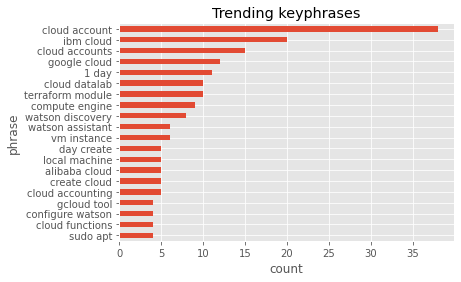

In [33]:
#Q3
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()